# Classification
---

In this notebook, we will be introduced to classification problems and how to solve them using supervised learning techniques.

### What is machine learning ?

It is the art of giving computers the ability to learn and make decisions from data without being explicitly programmed. Examples are:

* Learning to predict whether an email is spam or not.
* Clustering wikipedia entries into different cateogries.

There are different types of learning:

* Supervised learning: uses labeled data
* Unsupervised learning: uses unlabeled data
* Reinforcement learning

For unsupervised learning, the main target is **uncovering hidden patterns from unlabeled data**. For example:

* Grouping customers into distinct categories (Clustering)

For reinforcement learning, the software interacts with an environment. Its systems learn automatically to figure out how to **optimize their behavior** based on a give system of **rewards and punishments**. It has different applications in:

* Economics
* Genetics
* Game Development

However, the focus of the notebooks in this repository will be on supervised learning. In supervised learning, we have data points (examples) called predictor variables (features) and a target variable. Commonly, the data used in supervised learning is structred data commonly in tables. Each row represent a new sample point (example) while columns represent features.

The aim is to build a model that predict the target variable given the predictor variables (features). If the target variable in the form of classes, i.e. categorical variable (clicked/not clicked, spam/not spam, A/B/C), the task of building the model is called **classification**. However, if it is a continous variable, the task is called **regression**.

#### Naming conventions

* Features = predictor variables = independent variable
* Target variable = dependent variable = response variable

The aims of supervised learning can be:

* automate the time-consuming or expensive manual tasks
* make predictions about the future

For this notebook, One of the datasets we are going to use is the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

The features of this dataset are:

* petal length
* petal width
* sepal length
* sepal width

The targt is the species of the flower which can be one of these types/classes:

* versicolor
* virginica
* setosa

Iris dataset is one of the most famous datasets to begin learning machine learning. It can be even found in the `sklearn` package itself in the `dataset` module.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# load the iris dataset from the dataset module
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

we can think of `sklearn.utils.Bunch` as key-mapped dictionary.

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

The data is found at `data` for features and `target` for targets. And they are numpy arrays.

In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

We can check the shape of the data using `.shape` data member.

In [7]:
iris.data.shape

(150, 4)

The shape tells us that there are 150 rows and 4 columns. Which mean that there are 150 examples with 4 features.

In [8]:
iris.target.shape

(150,)

And the same number of sample of course for the target variable.

***NOTE:*** the target is already encoded in:

* 0 : setosa
* 1 : versicolor
* 2 : virginica

To know the order of the target names, we can use the `target_names` member of the iris dataset.

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We can apply some exploratory data analysis (EDA) to the data to investigate it further.

In [10]:
X = iris.data
y = iris.target

A common way to start the EDA specially for machine learning is to show the relationship between each pair of features. We can do this using `pd.plotting.scatter_matrix` and pass a dataframe of the features.

In [11]:
features_df = pd.DataFrame(X, columns=iris.feature_names)
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now, we can pass `features_df` to the `scatter_matrix` function from `pandas`.

```python
pd.plotting.scatter_matrix(
    features_df,
    c = y, # this tells to color each point differently for each class of the target
    figsize = [8, 8],
    s = 150, # this tells the size of the points
    marker = 'D' # this tells to make the marker shape as diamonds
)
```

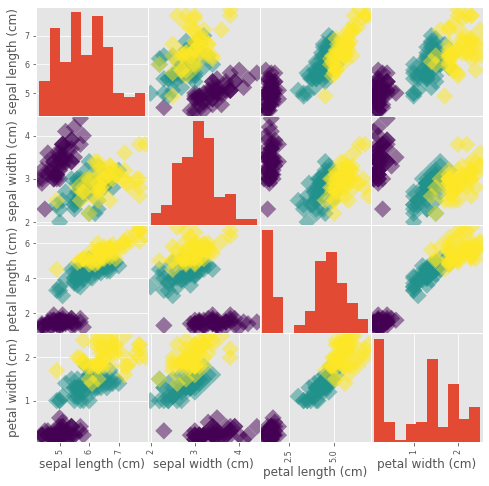

In [13]:
pd.plotting.scatter_matrix(
    features_df,
    c = y, # this tells to color each point differently for each class of the target
    figsize = [8, 8],
    s = 150, # this tells the size of the points
    marker = 'D' # this tells to make the marker shape as diamonds
);

The diagonal plots are histogram for each feature. The off-diagonal plots are scatter plots between each pair of features colored by the target examples

We will use also a couple of datasets along this notebook, one of them is the [
Congressional Voting Records Dataset](https://www.kaggle.com/devvret/congressional-voting-records/tasks?taskId=435). The dataset consists of the votes made by US House of Representatives Congressmen. Our aim is to predict their party affiliation (Democrat or Republican) based on how they voted on certain key issues.

***NOTE:*** In this notebook, we will use a cleaned version of the data in `house-votes-cleaned.csv`.

In [17]:
votes_df = pd.read_csv("assets/data/house-votes-cleaned.csv")
votes_df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty-free-exports,eaa-rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


For the EDA part of this dataset, `scatter plot` won't result in meaningful plots as all features are binary (0/1). We can apply the `countplot` from `seaborn` and use `party` as the hue for each plot.

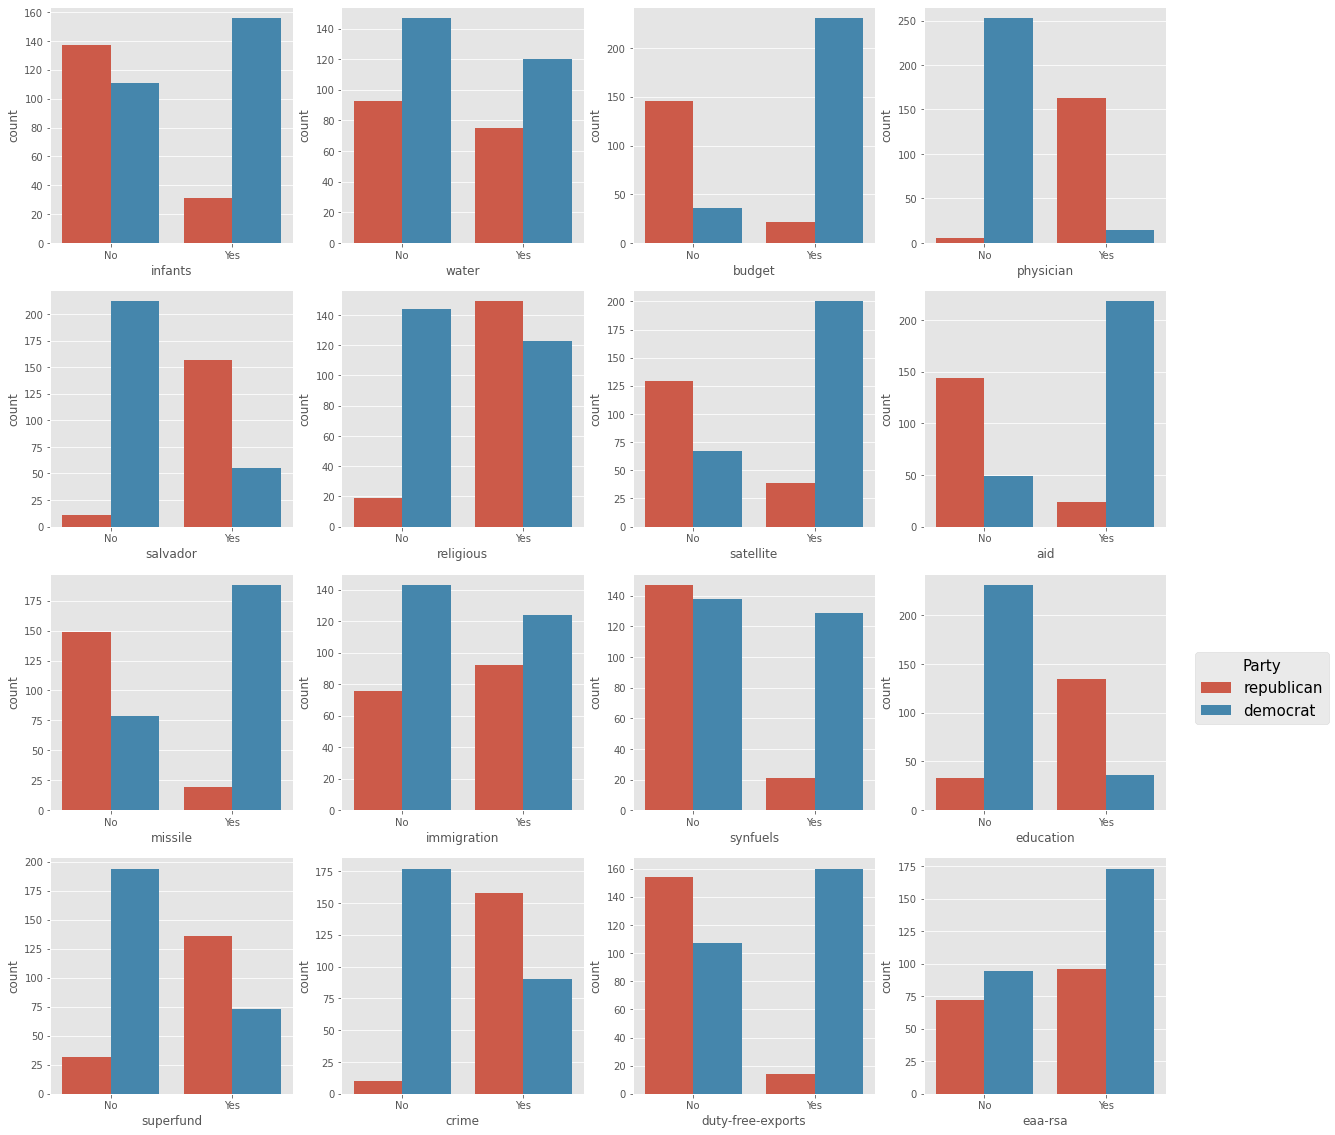

In [56]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))

for i, feature in enumerate(votes_df.columns[1:]):
    ax = axes.flatten()[i]
    sns.countplot(
        data = votes_df,
        x = feature,
        hue = "party",
        ax = ax,
    )
    ax.set_xticklabels(['No', 'Yes'])
    # the following part is to just keep one legend for all plots
    if i != 3:
        ax.legend([],[], frameon=False)
    else:
        ax.legend(title = "Party", bbox_to_anchor=(1.7, -1.7), fontsize=15, title_fontsize=15)

We can interpret that there are multiple categories (features) in which a party is dominant for voting over the other which is what we want from the machine to learn.

### The Classification Challenge

We want to build a classifier that takes unlabeled data (features) as input and predict the target variable. We first need to choose a type of classifiers and it needs to learn from already labeled data. For that, we call the already labeled data the **training data**.

We will choose a simple algorithm called *k-nearest neighbors*. It's based on finiding the $k$ closest neighbour points for the input point and then take the majority vote based on the value of the target variable of these neighbors.

All learning algorithms (machine learning models) in `sklearn` are implemented as classes. They provide methods for training and prediction and store the information and parameters learned from the data.

Training a model on the data is to fit the model to the data. In `sklearn` machine learning classes, the `.fit()` method applies the learning.

The `.predict()` is to predict the target for the input unlabeled data after training.

To use k-nearest neighbors, we import its class from `sklearn.neighbors`.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

Then we create instance of the class

In [60]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

Then we can fit the model to the features and target data using `.fit()` method.

In [61]:
knn_classifier.fit(X = iris['data'], y = iris['target'])

KNeighborsClassifier()

We now we have a classifier that we can use to predict given unlabeled data that it hasn't learnt from.

In [63]:
unlabeled_data = np.array([
    [5.6, 2.8, 3.9, 1.1],
    [5.7, 2.6, 3.8, 1.3],
    [4.7, 3.2, 1.3, 0.2]
])

predictions = knn_classifier.predict(unlabeled_data)

In [64]:
print(predictions)

[1 1 0]


Again we can check for the actual types using `target_names` from the `iris` dataset.

In [65]:
for pred in predictions:
    print(iris.target_names[pred])

versicolor
versicolor
setosa


We will do the same for the voting dataset. But becasue voting data is a `pd.DataFrame` that contains both features and target variable, we need to modify it a little bit.

In [66]:
voting_features = votes_df.drop(columns=['party']).values
voting_target = votes_df['party'].values

`.values` returns the data as `numpy` arrays.

In [67]:
# Create instance of KNeighborsClassifier
voting_knn = KNeighborsClassifier()

# Fit the classifier to the data
voting_knn.fit(X = voting_features, y = voting_target)

# predict for a sample point
sample = np.array([
    [0.696, 0.2861, 0.226851, 0.5513, 0.7194, 0.423, 0.980, 0.684, 0.48, 0.392, 0.343, 0.729, 0.4386, 0.059678, 0.398, 0.737]
])
voting_predictions = voting_knn.predict(sample)

print(voting_predictions)

['democrat']


### Measuring Model Peformance

Now, we need to measure how well a classifier learns using some metrics. The most common metric is **accuracy**. Accuracy of predictions is the fraction of the correct predictions to the total number of predictions. When measuring accuracy we need to make sure that these predictions are from samples that the classfier didn't see during learning. Otherwise, if we used some of the data used for training the classifier will not be *indicative of ability to generalize*.

The common technique is to split the labeled data into *training* and *test* set. We use the training data to fit the model. And the test set to make predictions that we compare them to the true values of the target variable from the test set to calculate the accuracy.

To split the data into training and test set. We use `train_test_split` function from `sklearn.model_selection`.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # targets
    test_size = 0.25, # the test set will be 25% of the whole dataset and the rest (75%)
    random_state = 42, # here, we set the random seed to some value to get reproducible results
    stratify = y # setting this will make the distribution of the target classes the same as training and test sets as well as the original dataset
)
```

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 21, stratify = iris.target)

Now we have training and test sets, we can repeat the learning cycle again.

In [70]:
# Create instance of the machine learning model
knn_classifier = KNeighborsClassifier(n_neighbors = 8)

# Fit the model using `training` features and targets 
knn_classifier.fit(X_train, y_train)

# Make the predictions using the test features
predictions = knn_classifier.predict(X_test)

We can get the accuracy score using the `.score` method by passing the `X_test` and `y_test`.

In [71]:
accuracy = knn_classifier.score(X_test, y_test)
accuracy

0.9555555555555556

We can see that the accuracy of our model is over 95% which is pretty good specially for a simple model like KNN. Note that in this model we set $k = 8$. For:

* larger $k$ : the dicision boundary is smoother and this leads to less complex model
* smaller $k$ : this lead to a more comlex model which can lead to overfitting.

**Remmber:** Overfitting is where the model performs very well on the training data but poorly on the test data. While underfitting is where the model doesn't perform well on training and testing data. To reach some point where it performs well on training and test data. We *tune* the parameter $k$ by trying different number of neighbors.

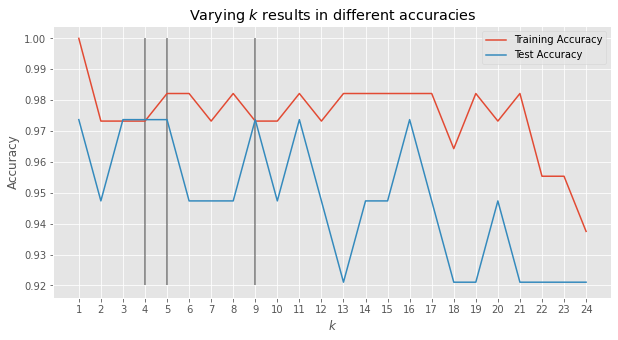

In [88]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 21, stratify = iris.target)

neighbors = range(1, 25)
training_accuracies = []
test_accuracies = []

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    training_acc = knn_classifier.score(X_train, y_train)
    test_acc = knn_classifier.score(X_test, y_test)
    training_accuracies.append(training_acc)
    test_accuracies.append(test_acc)
    
plt.figure(figsize=(10, 5))
training_plot = plt.plot(neighbors, training_accuracies, label = "Training Accuracy")
test_plot = plt.plot(neighbors, test_accuracies, label = "Test Accuracy")
plt.xticks(neighbors)
plt.xlabel("$k$")
plt.ylabel("Accuracy")
plt.title("Varying $k$ results in different accuracies")
plt.legend()

best_k = [4, 5, 9]
for k in best_k:
    plt.vlines(x = k, ymin = 0.92, ymax = 1, colors = "black", alpha =  0.5)
    

We can do the same for the voting dataset

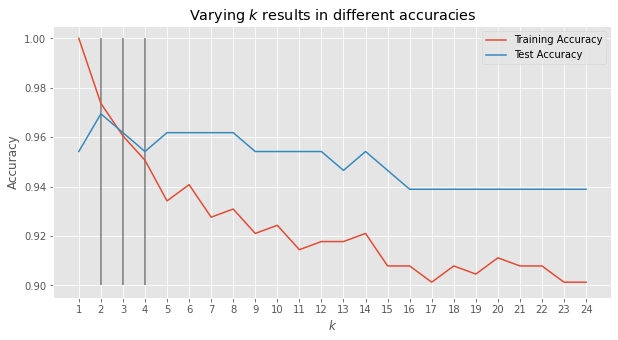

In [94]:
X_train, X_test, y_train, y_test = train_test_split(voting_features, voting_target, test_size = 0.3, random_state = 21, stratify = voting_target)

neighbors = range(1, 25)
training_accuracies = []
test_accuracies = []

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    training_acc = knn_classifier.score(X_train, y_train)
    test_acc = knn_classifier.score(X_test, y_test)
    training_accuracies.append(training_acc)
    test_accuracies.append(test_acc)
    
plt.figure(figsize=(10, 5))
training_plot = plt.plot(neighbors, training_accuracies, label = "Training Accuracy")
test_plot = plt.plot(neighbors, test_accuracies, label = "Test Accuracy")
plt.xticks(neighbors)
plt.xlabel("$k$")
plt.ylabel("Accuracy")
plt.title("Varying $k$ results in different accuracies")
plt.legend()

best_k = [2, 3, 4]
for k in best_k:
    plt.vlines(x = k, ymin = 0.9, ymax = 1, colors = "black", alpha =  0.5)